In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [26]:
train_df = pd.read_csv("train.csv", sep=",")
test_df = pd.read_csv("test.csv", sep=",")

In [27]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [29]:
train_df.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mrs. William Thompson (Edith Junkins)",male,1601,G6,S
freq,1,577,7,4,644


In [30]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values('Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [31]:
train_df[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values('Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [32]:
train_df[['SibSp', 'Survived']].groupby(['SibSp']).agg(['mean', 'count']).sort_values(('Survived', 'mean'), ascending=False)

Survived      
           mean count
SibSp                
1      0.535885   209
2      0.464286    28
0      0.345395   608
3      0.250000    16
4      0.166667    18
5      0.000000     5
8      0.000000     7

In [33]:
train_df[['Parch', 'Survived']].groupby(['Parch']).agg(['mean', 'count']).sort_values(('Survived', 'mean'), ascending=False)

Survived      
           mean count
Parch                
3      0.600000     5
1      0.550847   118
2      0.500000    80
0      0.343658   678
5      0.200000     5
4      0.000000     4
6      0.000000     1

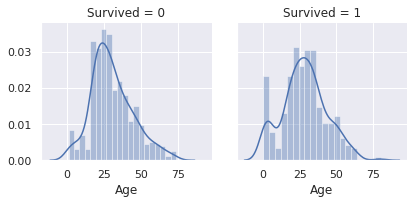

In [40]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(sns.distplot, 'Age', bins=20)

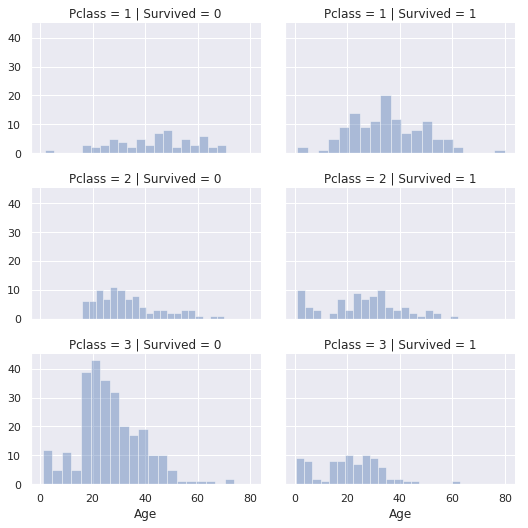

In [46]:
g = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.5, aspect=1.5)
g.map(sns.distplot, 'Age', bins=20, kde=False)

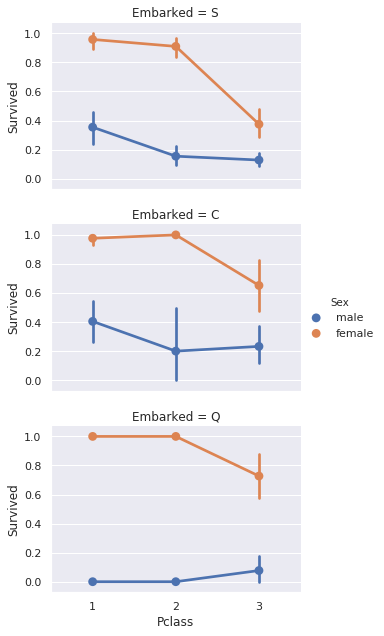

In [54]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', 
            row='Embarked', kind='point', height=3, aspect=1.5,
            data=train_df)